In [1]:
import sys
import logging
import argparse
import os
import shutil
import importlib.util
import torch
import gym
import copy
import git
import re
from tensorboardX import SummaryWriter
from crowd_sim.envs.utils.robot import Robot
from crowd_nav.utils.trainer import VNRLTrainer, MPRLTrainer
from crowd_nav.utils.memory import ReplayMemory
from crowd_nav.utils.explorer import Explorer
from crowd_nav.policy.policy_factory import policy_factory

In [2]:
from crowd_nav.configs.icra_benchmark.config import BaseEnvConfig, BasePolicyConfig, BaseTrainConfig, Config


class EnvConfig(BaseEnvConfig):
    def __init__(self, debug=False):
        super(EnvConfig, self).__init__(debug)
        self.env.randomize_attributes = True
        self.env.time_step = 0.25
        self.sim.centralized_planning = False
        self.sim.test_scenario = "corner"
        self.sim.human_num = 10
        self.humans.policy = "socialforce"

env_config = EnvConfig(True)
env = gym.make('CrowdSim-v0')
env.configure(env_config)
robot = Robot(env_config, 'robot')
robot.kinematics = "holonomic"
robot.time_step = env.time_step
robot.policy = policy_factory["socialforce"]()
robot.policy.multiagent_training = True
env.set_robot(robot)

# env.set_scene("corner")

In [3]:
rewards = []
ob = env.reset()


[2, 2, 2, 1, 3]
Spawn group 0 of size 2, center: [-5.14758452  2.44407575], goal: [ 2.35241548 -5.05592425]
Spawn group 1 of size 2, center: [ 3.10724792 -4.31466104], goal: [-4.39275208  3.18533896]
Spawn group 2 of size 2, center: [-5.61228577  1.87312973], goal: [ 1.88771423 -5.62687027]
Spawn group 3 of size 1, center: [-5.68573475  1.69136697], goal: [ 1.81426525 -5.80863303]
Spawn group 4 of size 3, center: [ 2.3686204  -4.32575945], goal: [-5.1313796   3.17424055]


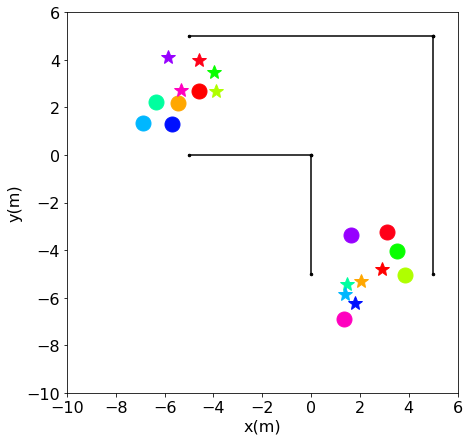

In [4]:
env.render("traj")